# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Plot-the-spectra-1" href="#Plot-the-spectra"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot the spectra</a></div><div class="lev1 toc-item"><a data-toc-modified-id="After-new-coverage-filtering-2" href="#After-new-coverage-filtering"><span class="toc-item-num">2&nbsp;&nbsp;</span>After new coverage filtering</a></div>

# Plot the spectra

In [1]:
# load dadi module

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [3]:
% ll

total 12
-rw-rw-r-- 1 claudius 2024 May  2 20:36 deduplicated_spectra.ipynb
lrwxrwxrwx 1 claudius   49 May  2 20:31 ERY.unfolded.sfs -> ../../ANGSD/DEDUPLICATED/SFS/ERY/ERY.unfolded.sfs
-rw-rw-r-- 1 claudius  394 May  2 20:32 ERY.unfolded.sfs.dadi
-rw-rw-r-- 1 claudius  382 May  2 20:32 ERY.unfolded.sfs.dadi~


In [4]:
! cat ERY.unfolded.sfs.dadi

37 unfolded
745530.973693 0.000000 0.000000 0.000000 1.511207 31.139915 742.277780 996.574840 53.835765 77.892464 267.864348 402.498556 1001.384506 799.908011 87.548144 10.417559 3.587466 28.043104 285.994523 553.041669 50.311759 12.307022 16.224191 140.823247 1223.664044 25.338529 0.000023 0.000000 0.000000 0.000000 0.000462 935.713047 238.873913 0.013095 414.707504 666.260896 1075.268716 


This doesn't look good!

In [10]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('ERY.unfolded.sfs.dadi')

fs_par = dadi.Spectrum.from_file('PAR.unfolded.sfs.dadi')

In [6]:
import pylab

In [7]:
%matplotlib inline

In [8]:
pylab.rcParams['figure.figsize'] = [14, 12]

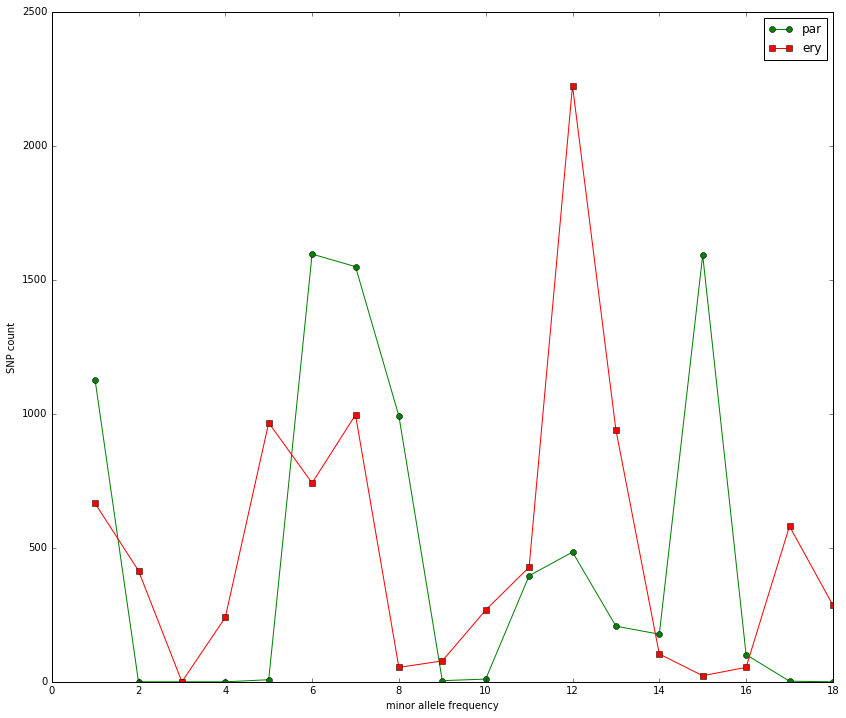

In [11]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()

What is going on here?

# After new coverage filtering

I have done new excess and minimum coverage filtering. See `excess_coverage_filter.py` and `minimum_coverage_filter.py`. This resulted in many more positions, contigs and reads retained, i. e. more info to determine SFS.

I have created SAF's with a minimum of 9 individuals with read data and used the accellerated version of the EM algorithm in `realSFS`.

In [1]:
# load dadi module

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [2]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('Ery.unfolded.sfs.dadi')

fs_par = dadi.Spectrum.from_file('Par.unfolded.sfs.dadi')

In [3]:
import pylab

In [4]:
%matplotlib inline

In [7]:
pylab.rcParams['figure.figsize'] = [12, 10]

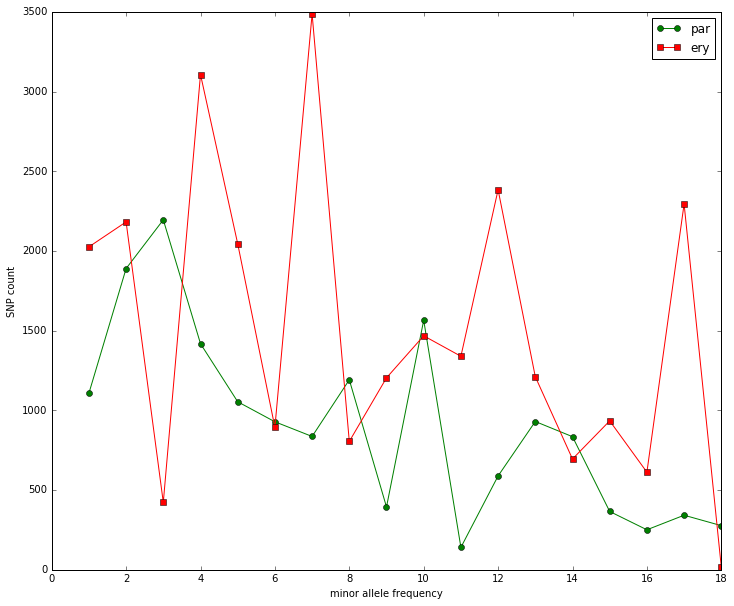

In [8]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()

Unfortunately, this is still completely unusable. Only few sites are inferred variable.

I think that the coverage is too low for ANGSD to be able to destinguish allele from sequencing errors. The ML SFS is therefore probably very unstable.